## Loading Libraries 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading data 

In [4]:
test_data = pd.read_csv(r'./data/test.csv')
train_data = pd.read_csv(r'./data/train.csv')

# Dropping nan 
test_data = test_data.dropna()
train_data  = train_data .dropna()

## Overview

In [5]:
whole_data = pd.concat([test_data, train_data])
whole_data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [54]:
# Quick overview of the numerical data 
whole_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129487.0,44158.973480,31209.526335,0.0,16230.0,38966.0,71440.5,103903.0
id,129487.0,64958.335169,37489.781165,1.0,32494.5,64972.0,97415.5,129880.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0


In [6]:
# Fonts and color palettes for figures 
TS = 12
LGF = 14
LBF = 14
colors = sns.color_palette('Set1')[0:2]
palette1 = sns.color_palette('Set1').as_hex()[0:2][::-1] # Red Blue from set 1 
palette2 = sns.color_palette('Set1').as_hex()[0:2] # Blue Red from set 1 

### Pie plot of satisfaction

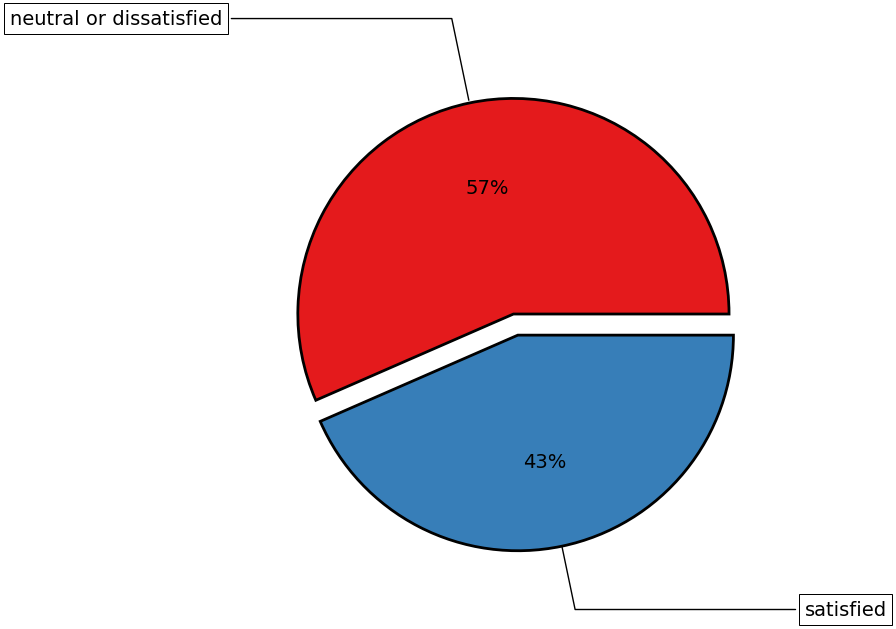

In [7]:
satisfaction_counts = whole_data.satisfaction.value_counts()

explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, pcts = ax.pie(
    satisfaction_counts.values, 
    explode = explode, 
    colors = colors, 
    autopct='%.0f%%',
    textprops={'fontsize': 14},
    wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 2, 
                      'antialiased': True}
    )

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(list(satisfaction_counts.index)[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, fontsize = 14, **kw)


In [8]:
whole_data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Plot for age distribution 

<Figure size 1000x700 with 0 Axes>

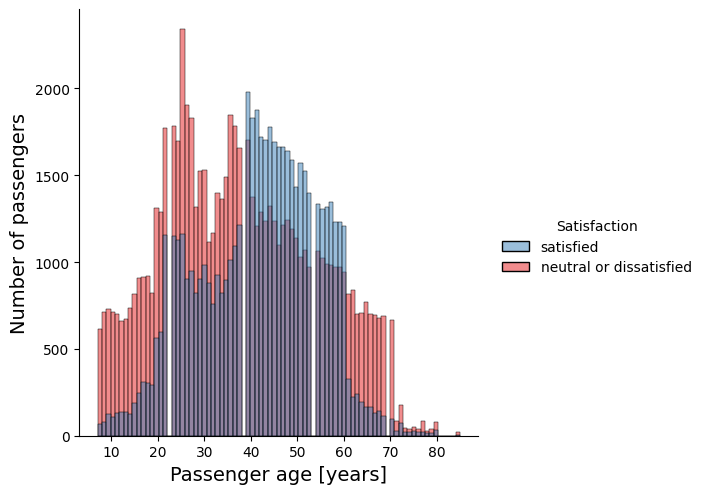

In [30]:
plt.figure(figsize = (10,7))

g = sns.displot(whole_data, x="Age", hue="satisfaction", palette = palette1)
plt.xlabel('Passenger age [years]', fontsize = LBF)
plt.ylabel('Number of passengers', fontsize = LBF)

g._legend.set_title('Satisfaction')

plt.gca().set_xticks
plt.show()

In [32]:
whole_data[['Class','Age']].groupby(['Class']).mean()

,Age
Class,
Business,41.619374
Eco,37.203589
Eco Plus,38.738380


### Arrival against departure delay colored by satisfaction

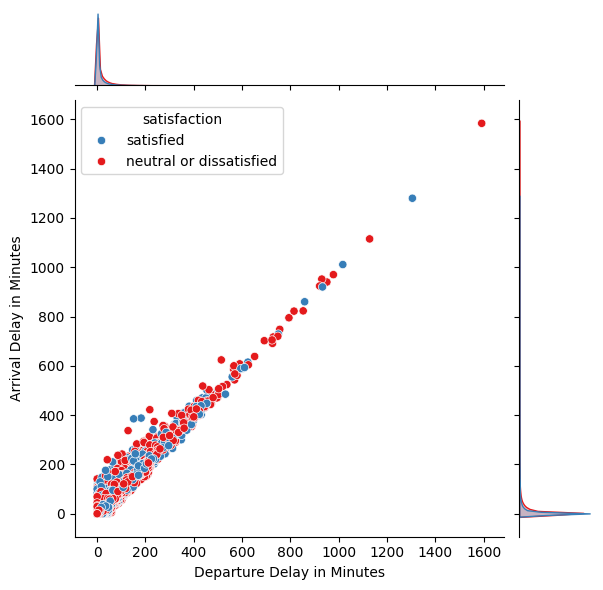

In [11]:

sns.jointplot(whole_data, x="Departure Delay in Minutes", y = 'Arrival Delay in Minutes', hue = 'satisfaction', palette = palette1)
# Too much overlap in this figure therefor overview below created 

C:\Users\taras\AppData\Local\Temp\ipykernel_32452\3985723124.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(


<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

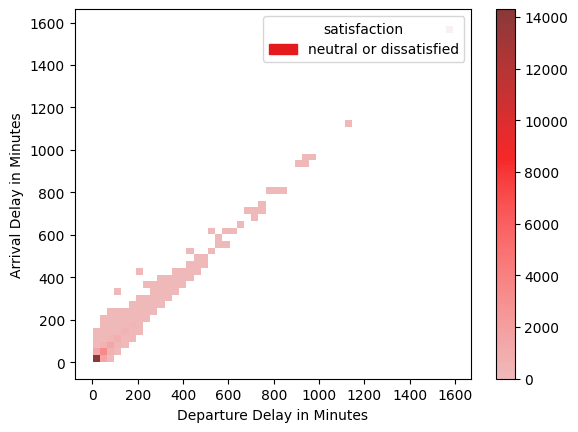

In [12]:
sns.histplot(
    whole_data[(whole_data.satisfaction == 'neutral or dissatisfied') & 
               (whole_data['Departure Delay in Minutes'] > 0) & 
               (whole_data['Arrival Delay in Minutes'] > 0)],
                 x="Departure Delay in Minutes", 
                 y = 'Arrival Delay in Minutes', 
                 hue = 'satisfaction', 
                 palette = palette2, 
                 bins = 50,
                 cbar=True
            )

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

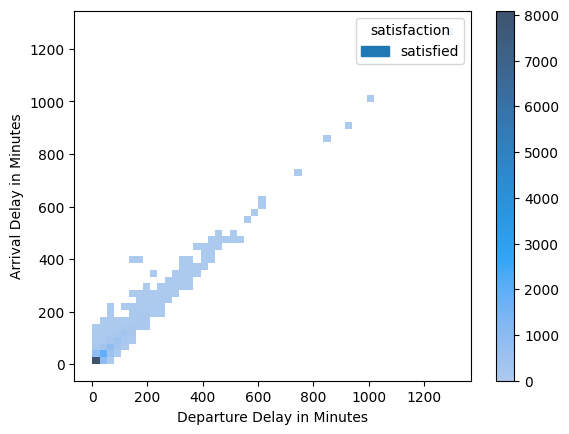

In [38]:
sns.histplot(
    whole_data[(whole_data.satisfaction == 'satisfied') & 
               (whole_data['Departure Delay in Minutes'] > 0) & 
               (whole_data['Arrival Delay in Minutes'] > 0)],
                 x="Departure Delay in Minutes", 
                 y = 'Arrival Delay in Minutes', 
                 hue = 'satisfaction', 
                 bins = 50,
                 cbar=True
            )

In [33]:
whole_data[['Class','Flight Distance']].groupby(['Class']).mean()

,Flight Distance
Class,
Business,1676.114486
Eco,743.548652
Eco Plus,746.444989


[None, None]

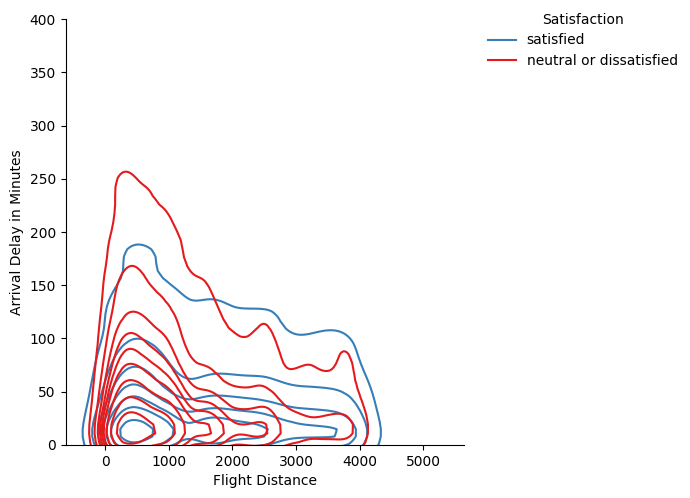

In [52]:
g = sns.displot(
    whole_data[(whole_data['Departure Delay in Minutes'] > 0) & 
               (whole_data['Arrival Delay in Minutes'] > 0)],
               x = 'Flight Distance', 
               y= "Arrival Delay in Minutes", 
               hue = 'satisfaction', 
               palette = palette1,
               kind="kde"
            )
plt.ylim(0,400)
g._legend.set(title="Satisfaction", loc="upper right")

In [ ]:
sns.histplot(
    whole_data[(whole_data.satisfaction == 'neutral or dissatisfied') & 
               (whole_data['Departure Delay in Minutes'] > 0) & 
               (whole_data['Arrival Delay in Minutes'] > 0)],
                 x="Departure Delay in Minutes", 
                 y = 'Flight Distance', 
                 hue = 'satisfaction', 
                 palette = palette2, 
                 bins = 50,
                 cbar=True
            )

### Custommer Ratings

In [14]:
'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'

IndentationError: unexpected indent (3333294504.py, line 2)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Departure/Arrival time convenient'),
  Text(1, 0, 'Ease of Online booking'),
  Text(2, 0, 'Gate location'),
  Text(3, 0, 'Food and drink'),
  Text(4, 0, 'Online boarding'),
  Text(5, 0, 'Seat comfort')])

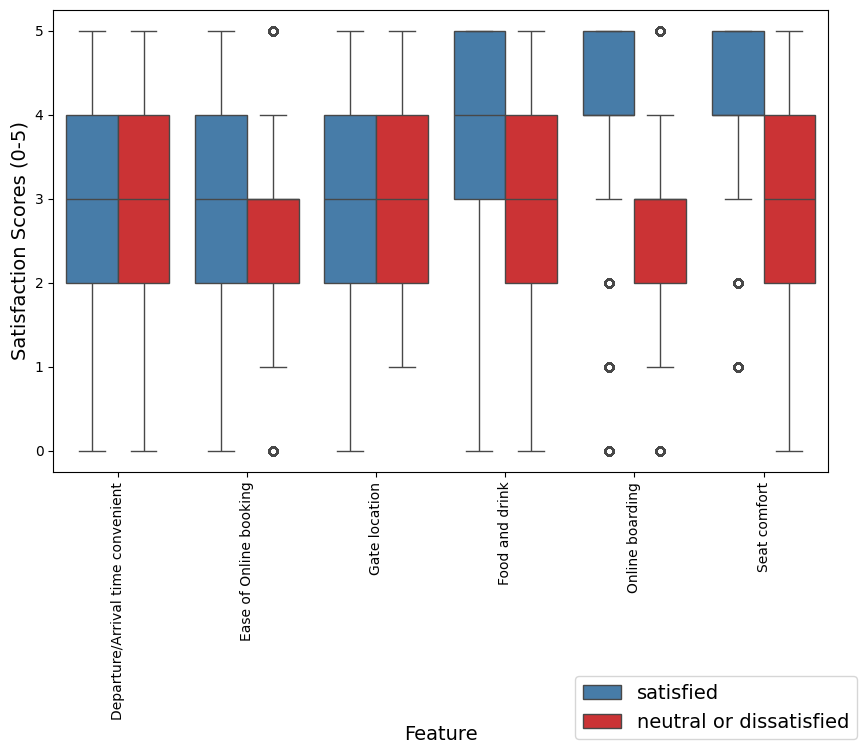

In [28]:
# If your DataFrame is from reading a CSV file, you would have loaded it as mentioned in the previous examples

# Melt the DataFrame to long format for better plotting
df_melted = whole_data.melt(
    id_vars=['satisfaction'], 
    value_vars=['Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort'
                ]
    )

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', hue='satisfaction', data=df_melted, palette=palette1)
plt.legend(bbox_to_anchor=(1.05, -.6), loc='lower right', fontsize = LGF)
# Set plot labels and title
plt.ylabel('Satisfaction Scores (0-5)', fontsize = LBF)
plt.xlabel('Feature', fontsize = LBF)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Inflight entertainment'),
  Text(1, 0, 'On-board service'),
  Text(2, 0, 'Leg room service'),
  Text(3, 0, 'Baggage handling'),
  Text(4, 0, 'Checkin service'),
  Text(5, 0, 'Inflight service'),
  Text(6, 0, 'Cleanliness')])

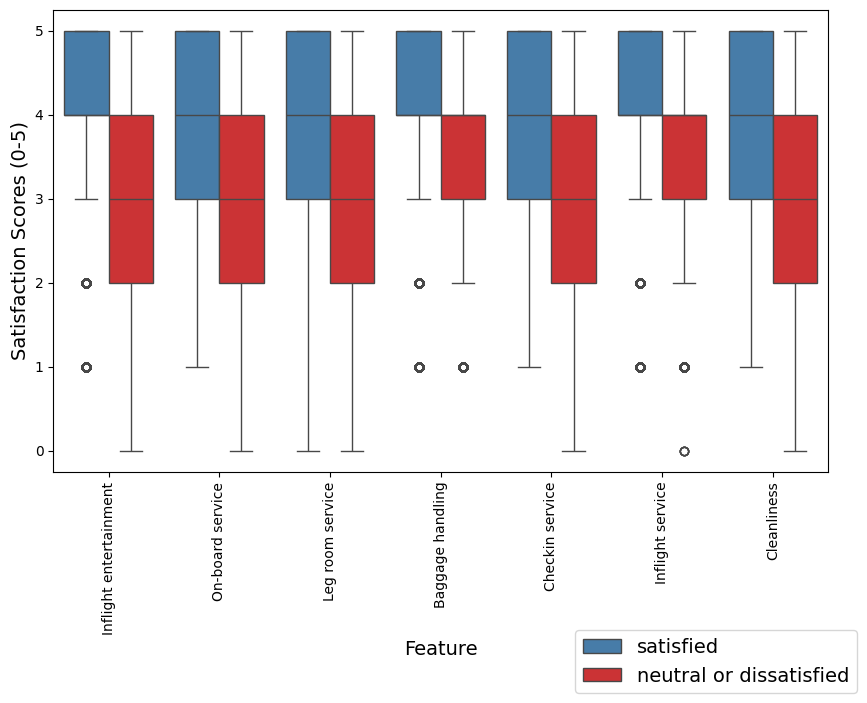

In [29]:
# If your DataFrame is from reading a CSV file, you would have loaded it as mentioned in the previous examples

# Melt the DataFrame to long format for better plotting
df_melted = whole_data.melt(
    id_vars=['satisfaction'], 
    value_vars=['Inflight entertainment', 
                'On-board service', 
                'Leg room service',
                'Baggage handling', 
                'Checkin service', 
                'Inflight service',
                'Cleanliness'
                ]
    )

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', hue='satisfaction', data=df_melted, palette=palette1)

plt.legend(bbox_to_anchor=(1.05, -.5), loc='lower right', fontsize = LGF)
plt.ylabel('Satisfaction Scores (0-5)', fontsize = LBF)
plt.xlabel('Feature', fontsize = LBF)
plt.xticks(rotation=90)

In [20]:
whole_data.groupby(['Age']).head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18140,18140,44737,Male,Loyal Customer,85,Business travel,Eco Plus,67,1,3,...,2,5,4,3,1,4,1,0,8.0,neutral or dissatisfied
20301,20301,64852,Female,Loyal Customer,79,Business travel,Business,1850,3,2,...,3,3,3,3,3,3,4,13,8.0,neutral or dissatisfied
23453,23453,70255,Female,Loyal Customer,85,Business travel,Business,992,4,4,...,2,4,4,4,5,2,5,0,5.0,satisfied
2023,2023,8581,Male,Loyal Customer,85,Business travel,Business,1904,3,2,...,1,2,3,3,3,1,3,14,7.0,neutral or dissatisfied


## Classification models 
### Processing data for models

In [32]:
# Function to encode columns with non-numerical data 
def get_encoded_data(data:pd.DataFrame)-> pd.DataFrame:
    """ """
    label_encoder = LabelEncoder()

    encoded_data = data.copy()
    encoded_data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])
    encoded_data['Gender'] = label_encoder.fit_transform(data['Gender'])
    encoded_data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])
    encoded_data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
    encoded_data['Class'] = label_encoder.fit_transform(data['Class'])
    return encoded_data

In [33]:
train_data_encoded = get_encoded_data(train_data)
test_data_encoded = get_encoded_data(test_data)

In [34]:
train_data_encoded.drop(train_data_encoded.columns[:2], axis=1, inplace=True)
test_data_encoded.drop(test_data_encoded.columns[:2], axis=1, inplace=True)

In [35]:
y_train = train_data_encoded['satisfaction']
X_train = train_data_encoded.iloc[:, :-1]

y_test = test_data_encoded['satisfaction']
X_test = test_data_encoded.iloc[:, :-1]

### Random Forest

In [36]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Model performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



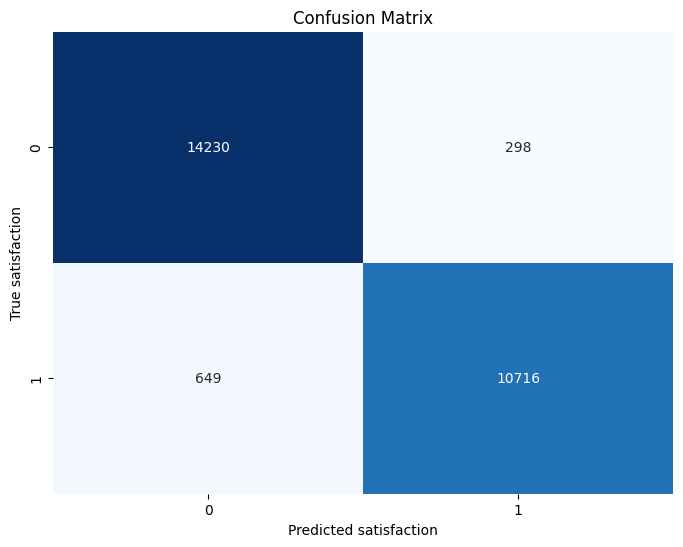

In [37]:
# Create a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted satisfaction')
plt.ylabel('True satisfaction')
plt.show()

[]

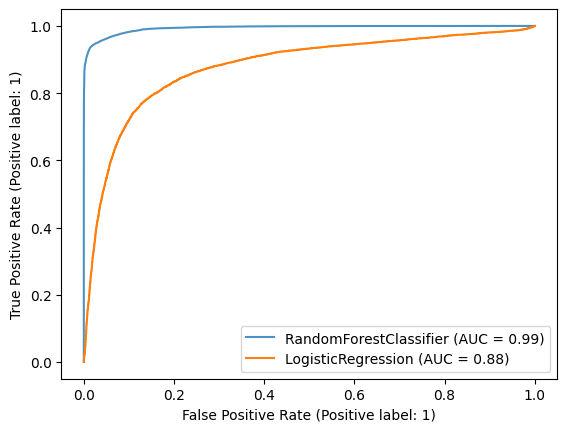

In [89]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test, ax=ax, alpha=0.8)
kmeans_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax = ax)
plt.plot()


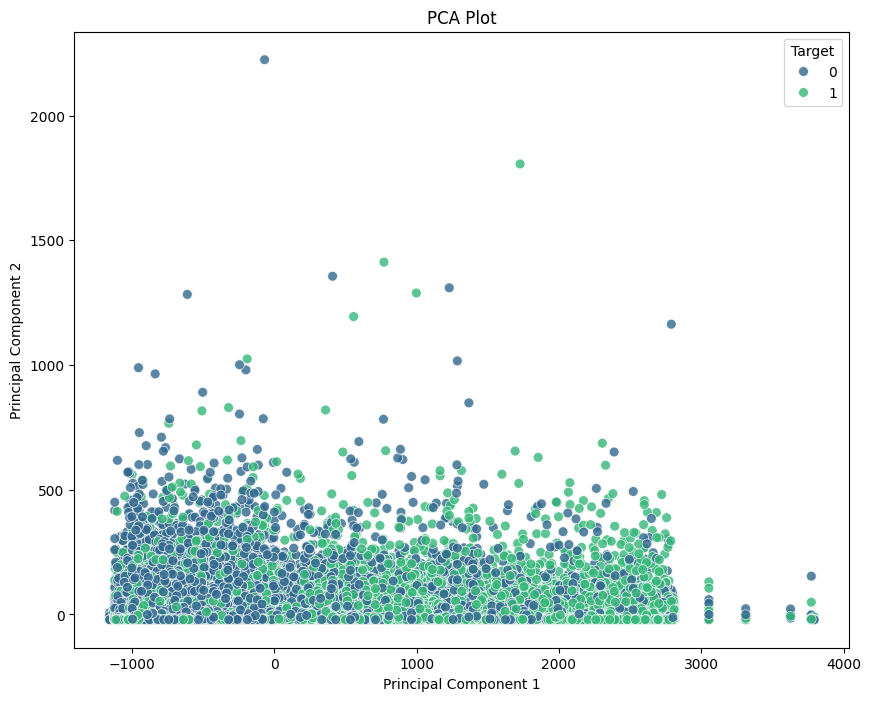

In [38]:

# Step 1: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components based on your needs
X_pca = pca.fit_transform(X_train)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the principal components with the target variable (assuming Y_train is your target)
df_pca['Target'] = y_train.reset_index(drop=True)

# Step 3: Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca, palette='viridis', s=50, alpha=0.8)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='best')
plt.show()

In [39]:
# head 
test_data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [40]:
test_data


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [41]:
# In a first step I need to 

## Overview

## Model

In [42]:
train_data['kmeans_labels'] = kmeans.labels_
mapping = {0: 'satisfied', 1: 'neutral or dissatisfied'} #'satisfied', 'neutral or dissatisfied'
train_data['kmeans_labels'] = train_data['kmeans_labels'].map(mapping)

NameError: name 'kmeans' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(train_data['satisfaction'], train_data['kmeans_labels'])

# Display the confusion matrix as a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Dissatisfied', 'Actual Satisfied'], columns=['Predicted Dissatisfied', 'Predicted Satisfied'])
print("Confusion Matrix:")
print(conf_matrix_df)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth, k_labels_matched)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

# Draft Section 


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Step 3: Create a logistic regression model
model = LogisticRegression()

# Step 4: Train the model using the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print additional metrics such as classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     14528
           1       0.78      0.82      0.80     11365

    accuracy                           0.82     25893
   macro avg       0.82      0.82      0.82     25893
weighted avg       0.82      0.82      0.82     25893



c:\Users\taras\GitRepositories\Airline_Passanger_Satisfaction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


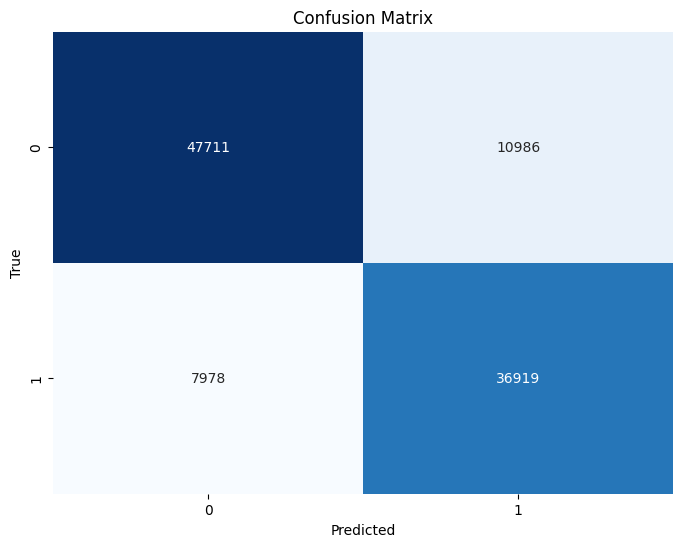

In [ ]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
len(test_data.satisfaction[test_data.satisfaction == 'satisfied'])
#palette = ['#fa3f3f', '#3dc71f']

11365